# Fraud Check Analysis- Random Forest Project

In [35]:
#importing packages
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [2]:
def read_data():
    path="D:/DATA SCIENCE/date_wise/Assignments/Nov_19/10. Random Forests/fraud_Check.csv"
    data=pd.read_csv(path)
    return data

In [3]:
# calling the function--
data= read_data()
print(data.head(2))

  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   

  Urban  
0   YES  
1   YES  


In [4]:
# Data copying
df=data.copy()
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### EDA (Exploratory Data Analysis)

In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [8]:
df.shape

(600, 6)

In [10]:
#Checking the missing values
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [11]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [12]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

<Axes: >

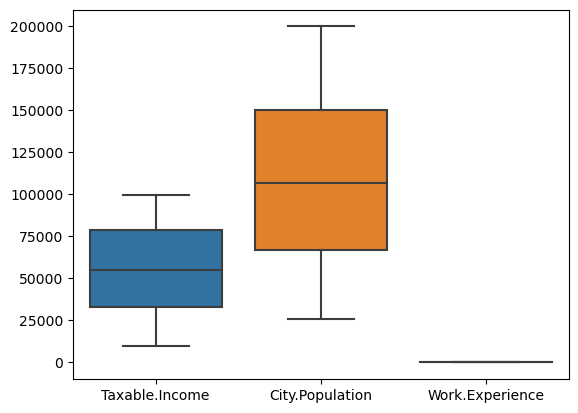

In [13]:
#Checking for outliers
sns.boxplot(df[['Taxable.Income','City.Population','Work.Experience']])

Text(0.5, 1.0, 'Work.Experience V/S City.Population')

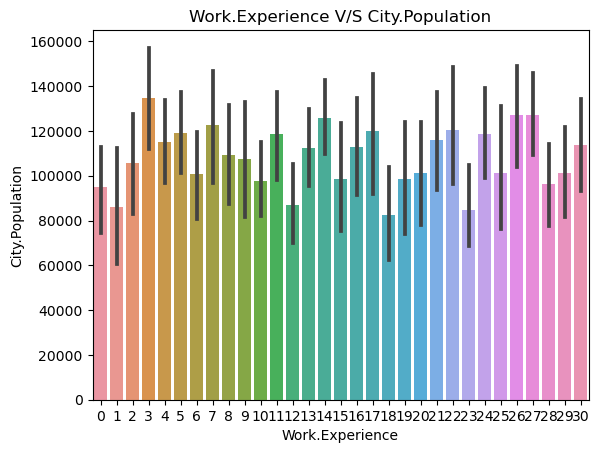

In [14]:
sns.barplot(x="Work.Experience",y="City.Population",data=df)
plt.title("Work.Experience V/S City.Population")

Text(0.5, 1.0, 'Count of Work.Experience')

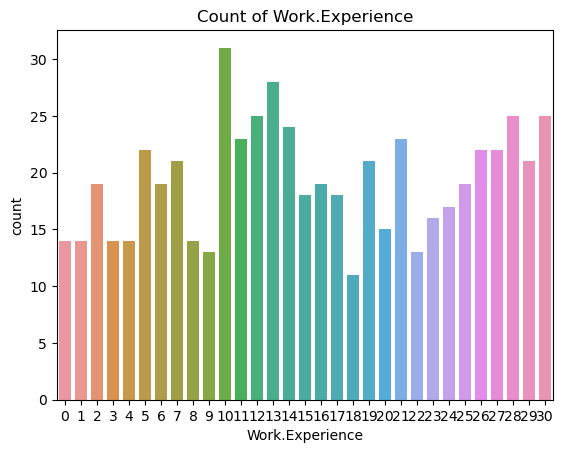

In [53]:
sns.countplot(x="Work.Experience",data=df)
plt.title("Count of Work.Experience")

Text(0.5, 1.0, 'City.Population V/S Taxable.Income')

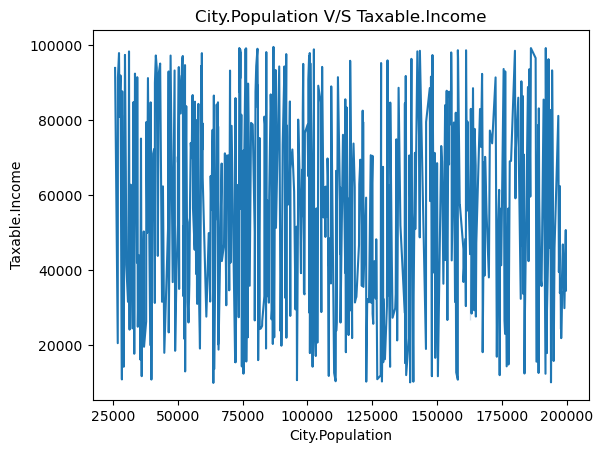

In [54]:
sns.lineplot(x="City.Population",y=data["Taxable.Income"],data=df)
plt.title("City.Population V/S Taxable.Income")

<Axes: >

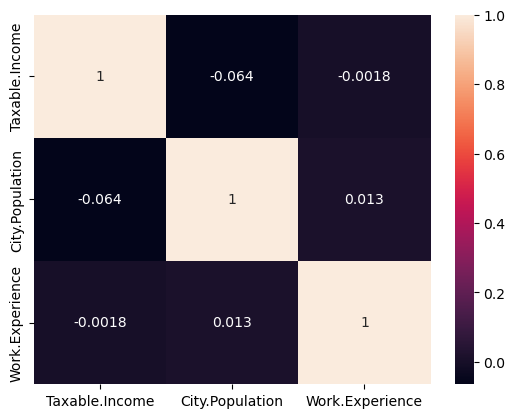

In [17]:
sns.heatmap(df[['Taxable.Income', 'City.Population', 'Work.Experience']].corr(),annot=True)

In [18]:
df[['Taxable.Income', 'City.Population', 'Work.Experience']].corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [21]:
## Treating those who have taxable_income <= 30000 as "Risky" and others are "Good".
conditions = [df['Taxable.Income'] <=30000, df['Taxable.Income'] > 30000]
categories = ['Risky', 'Good']
df['Taxable.Income']=np.where(conditions[0], categories[0], categories[1])
print(df)

    Undergrad Marital.Status Taxable.Income  City.Population  Work.Experience  \
0          NO         Single           Good            50047               10   
1         YES       Divorced           Good           134075               18   
2          NO        Married           Good           160205               30   
3         YES         Single           Good           193264               15   
4          NO        Married           Good            27533               28   
..        ...            ...            ...              ...              ...   
595       YES       Divorced           Good            39492                7   
596       YES       Divorced           Good            55369                2   
597        NO       Divorced           Good           154058                0   
598       YES        Married           Good           180083               17   
599        NO       Divorced           Good           158137               16   

    Urban  
0     YES  
1  

In [38]:
## Using One-hot encoding medthod to encode the categorical data into binary columns
X_columns = pd.get_dummies(df.drop(columns = ["Taxable.Income"]))
df_final= pd.concat([X_columns,df["Taxable.Income"]], axis = 1)

In [41]:
#Checking the columns names
df_final.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES', 'Taxable.Income'],
      dtype='object')

In [42]:
df_final['Taxable.Income'].value_counts()

Taxable.Income
Good     476
Risky    124
Name: count, dtype: int64

## Random Forest Classifier

In [45]:
def data_prep(df_final):
    X=df_final[['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES','Marital.Status_Divorced', 'Marital.Status_Married','Marital.Status_Single', 'Urban_NO', 'Urban_YES']]
    y=df_final['Taxable.Income']
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=123)
    return X_train, X_test,y_train,y_test

In [46]:
X_train,X_test,y_train,y_test=data_prep(df_final)

In [47]:
X_train.shape

(480, 9)

In [48]:
X_test.shape

(120, 9)

In [49]:
def rndm_tree(X_train,X_test,y_train):
    model_rf=RandomForestClassifier(criterion='entropy', max_depth=10)
    train_model=model_rf.fit(X_train,y_train)
    pred=train_model.predict(X_test)
    return pred

In [50]:
pred=rndm_tree(X_train,X_test,y_train)
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',

In [51]:
#Defining model diagnostics
def rndm_tree_diag(y_test,pred):
    acc=accuracy_score(y_test, pred)
    clf=classification_report(y_test,pred)
    conf=confusion_matrix(y_test,pred)
    return acc,clf,conf

In [52]:
acc,clf,conf=rndm_tree_diag(y_test,pred)
print("The accuracy score:",acc)
print("------------------------------")
print("The Classification Report:", clf)
print("------------------------------")
print("The Confusion Matrix:",conf)

The accuracy score: 0.7333333333333333
------------------------------
The Classification Report:               precision    recall  f1-score   support

        Good       0.78      0.93      0.84        94
       Risky       0.12      0.04      0.06        26

    accuracy                           0.73       120
   macro avg       0.45      0.48      0.45       120
weighted avg       0.64      0.73      0.67       120

------------------------------
The Confusion Matrix: [[87  7]
 [25  1]]


##### Here, our model is giving only 73.34% accuracy which is coparatively low, and the reason which we can see is there are multiple independent variables which we have used. We can use the feature engineering here and iprove the acuracy of model by adding or removing features based on their importance.